This file is written leveraging a tutorial available here:
https://dev.to/lewiskori/introduction-to-web-scraping-with-python-24li

Let's import the libraries we'll need for this:  requests and BeautifulSoup

In [2]:
import requests
from bs4 import BeautifulSoup

We'll now configure a default Firefox agent type for the requests engine

In [3]:
# configure user agent
header = {'User-Agent': 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7'}

With that set, let's set the URL we'll be scraping from:

In [4]:
# configure base URL
base_url = "https://www.amazon.com/hz/audible/matchmaker?_encoding=UTF8&ref_=wfv_featuredoc_mm"

We'll pull down the file hosted at that endpoint

In [5]:
# create initial request and save response object
r = requests.get(base_url, headers=header)

Now, let's check that the requests was successful.  We should see a 200 (HTTP response code) when we print the value of our requests object

In [6]:
print(r)

<Response [200]>


Alright, we've inspected the page in Firefox as follows.  Note the location in the DOM that we're after:
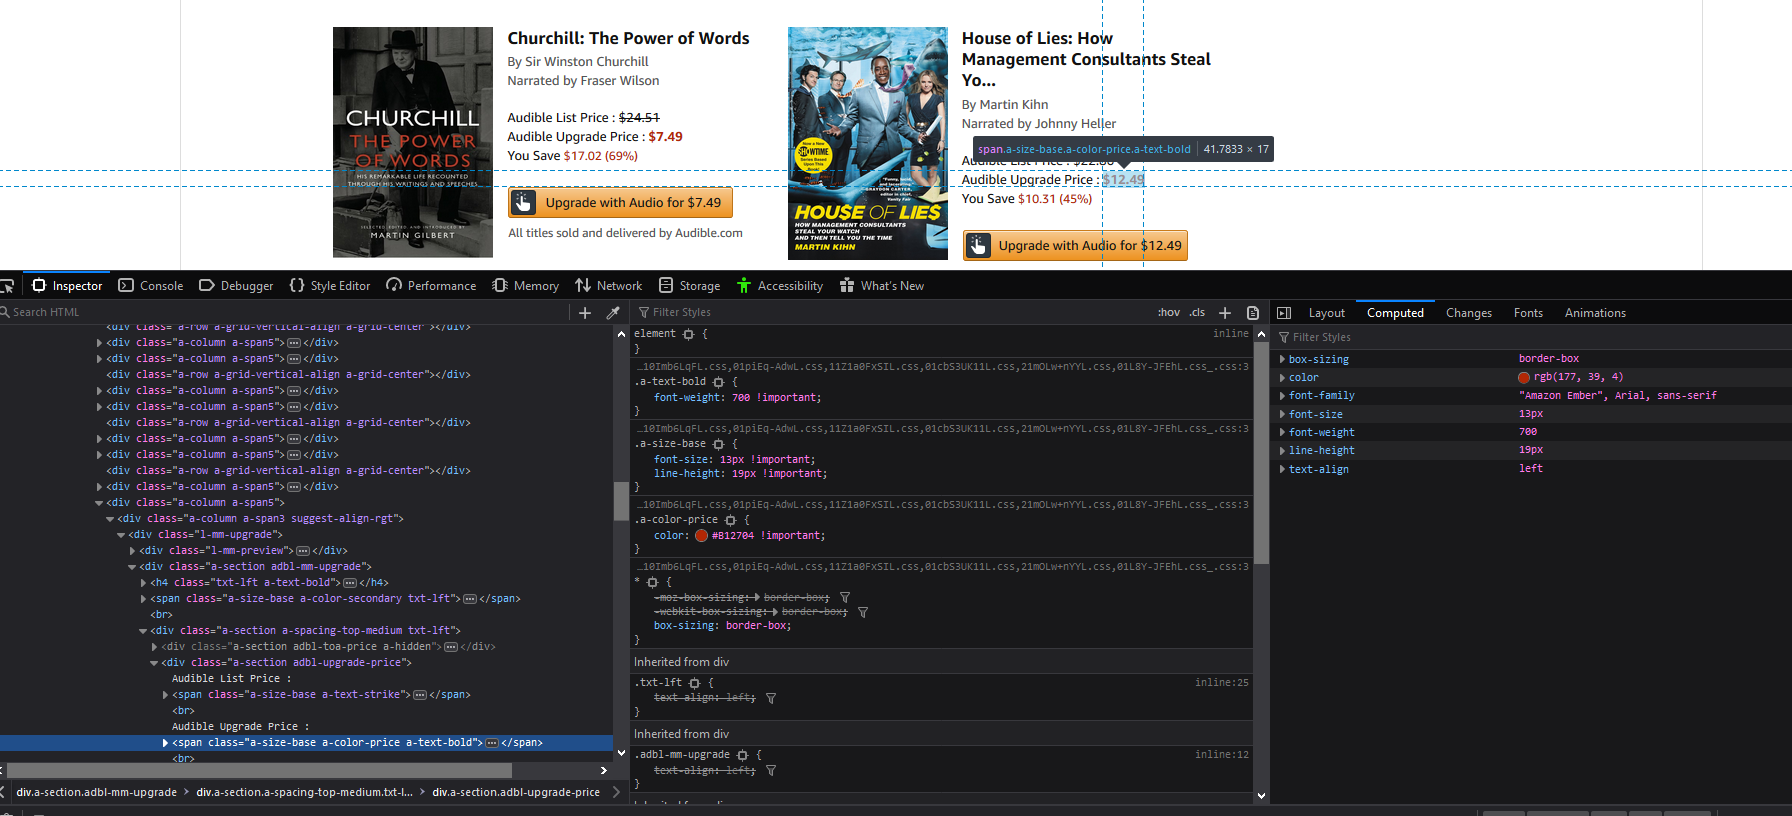

Let's copy the CSS Path so we get it:  

html.a-ws.a-js.a-audio.a-video.a-canvas.a-svg.a-drag-drop.a-geolocation.a-history.a-webworker.a-autofocus.a-input-placeholder.a-textarea-placeholder.a-local-storage.a-gradients.a-transform3d.a-touch-scrolling.a-text-shadow.a-text-stroke.a-box-shadow.a-border-radius.a-border-image.a-opacity.a-transform.a-transition.a-ember body.a-m-us.a-aui_152852-c.a-aui_157141-c.a-aui_158613-t1.a-aui_160684-t1.a-aui_72554-c.a-aui_dropdown_187959-c.a-aui_perf_130093-c.a-aui_tnr_v2_180836-c.a-aui_ux_145937-c.a-meter-animate div#a-page div#mm-gallery-view.a-section div.a-section.a-text-left div.a-box-group div.a-box.a-text-left.mm-gallary-main div.a-box-inner.a-padding-none div.a-section.adbl-mm-gallery-core div.a-column.a-span5 div.a-column.a-span3.suggest-align-rgt div.l-mm-upgrade div.a-section.adbl-mm-upgrade div.a-section.a-spacing-top-medium.txt-lft div.a-section.adbl-upgrade-price span.a-size-base.a-color-price.a-text-bold

Note that the last span is the bit we're after:  span.a-size-base.a-color-price.a-text-bold

We should be good to set BeautifulSoup to find all of it and off we go ...

In [7]:
soup = BeautifulSoup(markup=r, features='html.parser')
print(soup.prettify())

TypeError: object of type 'Response' has no len()

Drats!  I've forgotten to pass the request TEXT to BeautifulSoup ...

In [8]:
soup = BeautifulSoup(markup=r.text, features='html.parser')
print(soup.prettify())

;"undefined"!==typeof g&&(d+="&"+e+"="+g)}return d}function k(a){if("undefined"!==typeof a&&"undefined"!==typeof g)return a-g}function q(a,c){b&&(g=c,b.timing.transitionStart=a,b.transition.type="view-transition",b.transition.subType="ajax-transition",b.transition.launchType="normal",ue_mbl.cnt=h)}var c=e.ue||{},g=e.ue_t0,b;if(a.P&&a.P.when&&a.P.register)return a.P.when("CSMPlugin").execute(function(a){a.buildAMZNPerformance&&a.buildAMZNPerformance({successCallback:l,
failCallback:p})}),{cnt:h,ajax:q}},"mobile-timing")(ue_csm,window);

(function(d){d._uess=function(){var a="";screen&&screen.width&&screen.height&&(a+="&sw="+screen.width+"&sh="+screen.height);var b=function(a){var b=document.documentElement["client"+a];return"CSS1Compat"===document.compatMode&&b||document.body["client"+a]||b},c=b("Width"),b=b("Height");c&&b&&(a+="&vw="+c+"&vh="+b);return a}})(ue_csm);

(function(a){var b=document.ue_backdetect;b&&b.ue_back&&a.ue&&(a.ue.bfini=b.ue_back.value);a.uet&&a.uet("be");a.onLdEnd&

Right!  Let's find all of the spans with our desired class, then ...

In [10]:
upgrade_prices = soup.findAll(name='span', attrs={'class' : 'a-size-base a-color-price a-text-bold'})
print(upgrade_prices)

[]


Hrmm ... why's it empty?  Are we sure we've actually gotten the page we are browsing in Firefox?  Let's dump it to a text file and have a look ...

In [11]:
soup_outfile = open('soup_out.html', 'w')
soup_outfile.write(soup.prettify())

UnicodeEncodeError: 'charmap' codec can't encode character '\u25ec' in position 67782: character maps to <undefined>

WTF is this error?  Perhaps we need to specify the encoding as we output?  Let's convert the entire prettified soup to a string encoded as utf-8.

In [14]:
soupstring = str(soup.prettify()).encode('utf-8')
soup_outfile.write(soupstring)

TypeError: write() argument must be str, not bytes

WTF!  Now it's bitching that we're passing the outfile bytes instead of a string?  Alright ... let's open the file as a writeable binary then ...

In [15]:
soup_outfile = open(file='soup_out.html', mode='wb')
soup_outfile.write(soupstring)

67581

Bingo!  Now, let's pop over and browse that MF ...

Looking at the code, and then viewing it in a browser to confirm, shows that we've overlooked the fact that our scraper isn't logged in to Amazon!  We'll explore doing that using Selenium to scrape later.  For now, let's just save the webpage from Audible and scrape that beast ...

Donezo ...

Now, let's run that back through BeautifulSoup ...

In [17]:
infile = open(file='audible_matchmaker.html', mode='r')
soup = BeautifulSoup(markup=infile, features='html.parser')
print(soup.prettify())

House
        </div>
       </a>
      </li>
      <li>
       <a class="hmenu-item" href="https://www.amazon.com/gp/browse.html?node=12034493011&amp;ref_=nav_em_T1_0_3_29_5_al_fsd_body">
        <div>
         Body
        </div>
       </a>
      </li>
      <li>
       <a class="hmenu-item" href="https://www.amazon.com/gp/browse.html?node=12034492011&amp;ref_=nav_em_T1_0_3_29_6_al_fsd_food">
        <div>
         Food
        </div>
       </a>
      </li>
      <li>
       <a class="hmenu-item" href="https://www.amazon.com/gp/browse.html?node=12632031011&amp;ref_=nav_em_T1_0_3_29_7_al_fsd_collections">
        <div>
         Collections
        </div>
       </a>
      </li>
      <li>
       <a class="hmenu-item" href="https://www.amazon.com/gp/browse.html?node=13270237011&amp;ref_=nav_em_T1_0_3_29_8_al_fsd_gifts">
        <div>
         Gifts
        </div>
       </a>
      </li>
      <li class="hmenu-separator">
      </li>
     </ul>
     <ul class="hmenu hmenu-translateX-ri

Brilliant!  It looks like it's worked.  Let's find all of those cheeky spans now ...

In [18]:
upgrade_prices = soup.findAll(name='span', attrs={'class' : 'a-size-base a-color-price a-text-bold'})
print(upgrade_prices)

[<span class="a-size-base a-color-price a-text-bold">
                                 $7.49
                             </span>, <span class="a-size-base a-color-price a-text-bold">
                                 $7.49
                             </span>, <span class="a-size-base a-color-price a-text-bold">
                                 $7.49
                             </span>, <span class="a-size-base a-color-price a-text-bold">
                                 $7.49
                             </span>, <span class="a-size-base a-color-price a-text-bold">
                                 $7.49
                             </span>, <span class="a-size-base a-color-price a-text-bold">
                                 $7.49
                             </span>, <span class="a-size-base a-color-price a-text-bold">
                                 $4.49
                             </span>, <span class="a-size-base a-color-price a-text-bold">
                                 $7.

Very good!  This looks like a list ... let's confirm before we bash through the math ...

In [19]:
type(upgrade_prices)

bs4.element.ResultSet

Hrmm ... let's see what it looks like when we iterate over it ...

In [21]:
for result in upgrade_prices:
    print(type(result))
    print(result)

<class 'bs4.element.Tag'>
<span class="a-size-base a-color-price a-text-bold">
                                 $7.49
                             </span>
<class 'bs4.element.Tag'>
<span class="a-size-base a-color-price a-text-bold">
                                 $7.49
                             </span>
<class 'bs4.element.Tag'>
<span class="a-size-base a-color-price a-text-bold">
                                 $7.49
                             </span>
<class 'bs4.element.Tag'>
<span class="a-size-base a-color-price a-text-bold">
                                 $7.49
                             </span>
<class 'bs4.element.Tag'>
<span class="a-size-base a-color-price a-text-bold">
                                 $7.49
                             </span>
<class 'bs4.element.Tag'>
<span class="a-size-base a-color-price a-text-bold">
                                 $7.49
                             </span>
<class 'bs4.element.Tag'>
<span class="a-size-base a-color-price a-tex

What can we do with these Tag objects from BeautifulSoup?

https://www.crummy.com/software/BeautifulSoup/bs4/doc/#navigating-the-tree

Is the _contents_ property what we're after?

In [28]:
for book in upgrade_prices:
    print(book.contents)

['\n                                 $7.49\n                             ']
['\n                                 $7.49\n                             ']
['\n                                 $7.49\n                             ']
['\n                                 $7.49\n                             ']
['\n                                 $7.49\n                             ']
['\n                                 $7.49\n                             ']
['\n                                 $4.49\n                             ']
['\n                                 $7.49\n                             ']
['\n                                 $12.99\n                             ']
['\n                                 $7.49\n                             ']
['\n                                 $7.49\n                             ']
['\n                                 $4.87\n                             ']
['\n                                 $7.49\n                             ']
['\n       

Hrmm ... that's close ... let's read some more docs:  https://www.crummy.com/software/BeautifulSoup/bs4/doc/#searching-the-tree

It seems we can modify the "string" of a tag, so let's just pull the string and have a look at it ...

In [29]:
for book in upgrade_prices:
    print(book.string)


                                 $7.49
                             

                                 $7.49
                             

                                 $7.49
                             

                                 $7.49
                             

                                 $7.49
                             

                                 $7.49
                             

                                 $4.49
                             

                                 $7.49
                             

                                 $12.99
                             

                                 $7.49
                             

                                 $7.49
                             

                                 $4.87
                             

                                 $7.49
                             

                                 $12.99
                             

                 

Excellent!  That's what we're after!  Let's convert each of these strings into numbers and then sum them ...

In [32]:
total_upgrade_price = 0
string = 's'

for book in upgrade_prices:
    price_string = book.string
    price_string = price_string.replace('$', '')
    price = float(price_string)
    total_upgrade_price += price

print(total_upgrade_price)

465.0700000000004


SHAZAAAAM!  There we have it!

Takeaways from this session:
* How easy it is to scrape
* The errors we've encountered
* We'll need to learn how to login to sites when scraping later (find a good selenium tutorial ...)